# Mercedes-Benz-Greener-Manufacturing

- 벤츠 자동차의 테스트 시스템의 속도를 최적화 구하기
- 평가 방법 : R^2 Score
- https://www.kaggle.com/competitions/mercedes-benz-greener-manufacturing/overview

```
    train.csv - the training set
    test.csv - the test set, you must predict the 'y' variable for the 'ID's in this file
    sample_submission.csv - a sample submission file in the correct format
```

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 데이터 로드

In [2]:
base_path = "../data/benz/"
train = pd.read_csv(f'{base_path}/train.csv.zip', index_col="ID")
test = pd.read_csv(f'{base_path}/test.csv.zip', index_col="ID")
submission = pd.read_csv(f'{base_path}/sample_submission.csv.zip', index_col="ID")

train.shape, test.shape, submission.shape

((4209, 377), (4209, 376), (4209, 1))

In [3]:
train.head()

,y,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
ID,,,,,,,,,,,,,,,,,,,,,
0,130.81,k,v,at,a,d,u,j,o,0,...,0,0,1,0,0,0,0,0,0,0
6,88.53,k,t,av,e,d,y,l,o,0,...,1,0,0,0,0,0,0,0,0,0
7,76.26,az,w,n,c,d,x,j,x,0,...,0,0,0,0,0,0,1,0,0,0
9,80.62,az,t,n,f,d,x,l,e,0,...,0,0,0,0,0,0,0,0,0,0
13,78.02,az,v,n,f,d,h,d,n,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
test.head()

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
ID,,,,,,,,,,,,,,,,,,,,,
1,az,v,n,f,d,t,a,w,0,0,...,0,0,0,1,0,0,0,0,0,0
2,t,b,ai,a,d,b,g,y,0,0,...,0,0,1,0,0,0,0,0,0,0
3,az,v,as,f,d,a,j,j,0,0,...,0,0,0,1,0,0,0,0,0,0
4,az,l,n,f,d,z,l,n,0,0,...,0,0,0,1,0,0,0,0,0,0
5,w,s,as,c,d,y,i,m,0,0,...,1,0,0,0,0,0,0,0,0,0


In [5]:
submission.head()

,y
ID,
1,100.669318
2,100.669318
3,100.669318
4,100.669318
5,100.669318


Q. 왜 이렇게 데이터를 제공할까?
- 보안 이슈

```plain text
benz 데이터는 제조 데이터이다. 
제조 데이터는 생산 공정 센서 데이터를 주로 사용한다.(온도,습도, 위치, 환경 등에 대한 데이터)
센서 데이터는 해당 센서 제품에 따라 로그를 기록할 때 DB에 기록하기도 하고, 파일로 기록하기도 한다.
단점 : anonymized set of variables. 익명화되어 있다.
```

## EDA

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4209 entries, 0 to 8417
Columns: 377 entries, y to X385
dtypes: float64(1), int64(368), object(8)
memory usage: 12.1+ MB


In [7]:
train.describe()

,y,X10,X11,X12,X13,X14,X15,X16,X17,X18,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
count,4209.000000,4209.000000,4209.0,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,...,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000
mean,100.669318,0.013305,0.0,0.075077,0.057971,0.428130,0.000475,0.002613,0.007603,0.007840,...,0.318841,0.057258,0.314802,0.020670,0.009503,0.008078,0.007603,0.001663,0.000475,0.001426
std,12.679381,0.114590,0.0,0.263547,0.233716,0.494867,0.021796,0.051061,0.086872,0.088208,...,0.466082,0.232363,0.464492,0.142294,0.097033,0.089524,0.086872,0.040752,0.021796,0.037734
min,72.110000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.820000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,99.150000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,109.010000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,265.320000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
# nunique 값의 nunique 값

n_unique_train = train.nunique()
n_unique_train.sort_values().unique()

array([   1,    2,    4,    7,   12,   25,   27,   29,   44,   47, 2545],
      dtype=int64)

In [9]:
# nunique() 값이 1이라는건, 유일값이 1가지라는 이야기이다. 
# 이런 데이터는 분석에 도움이 되지 않을거라 예상된다. 특히, 데이터가 전부 0이기 때문에 필요하지 않을것같다. 

train_one_index = n_unique_train[n_unique_train==1].index
train[train_one_index].describe()

,X11,X93,X107,X233,X235,X268,X289,X290,X293,X297,X330,X347
count,4209.0,4209.0,4209.0,4209.0,4209.0,4209.0,4209.0,4209.0,4209.0,4209.0,4209.0,4209.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
# 분석에 필요하지 않은 train_one_index 값들 삭제!
# 해당 코드를 두번실행하면 keyError 발생한다. (이미 삭제되서 없는 컬럼을 삭제하려고 하니까.)
# test 값 삭제할때도 기준은 train이다!

train = train.drop(columns=train_one_index)
test = test.drop(columns=train_one_index)

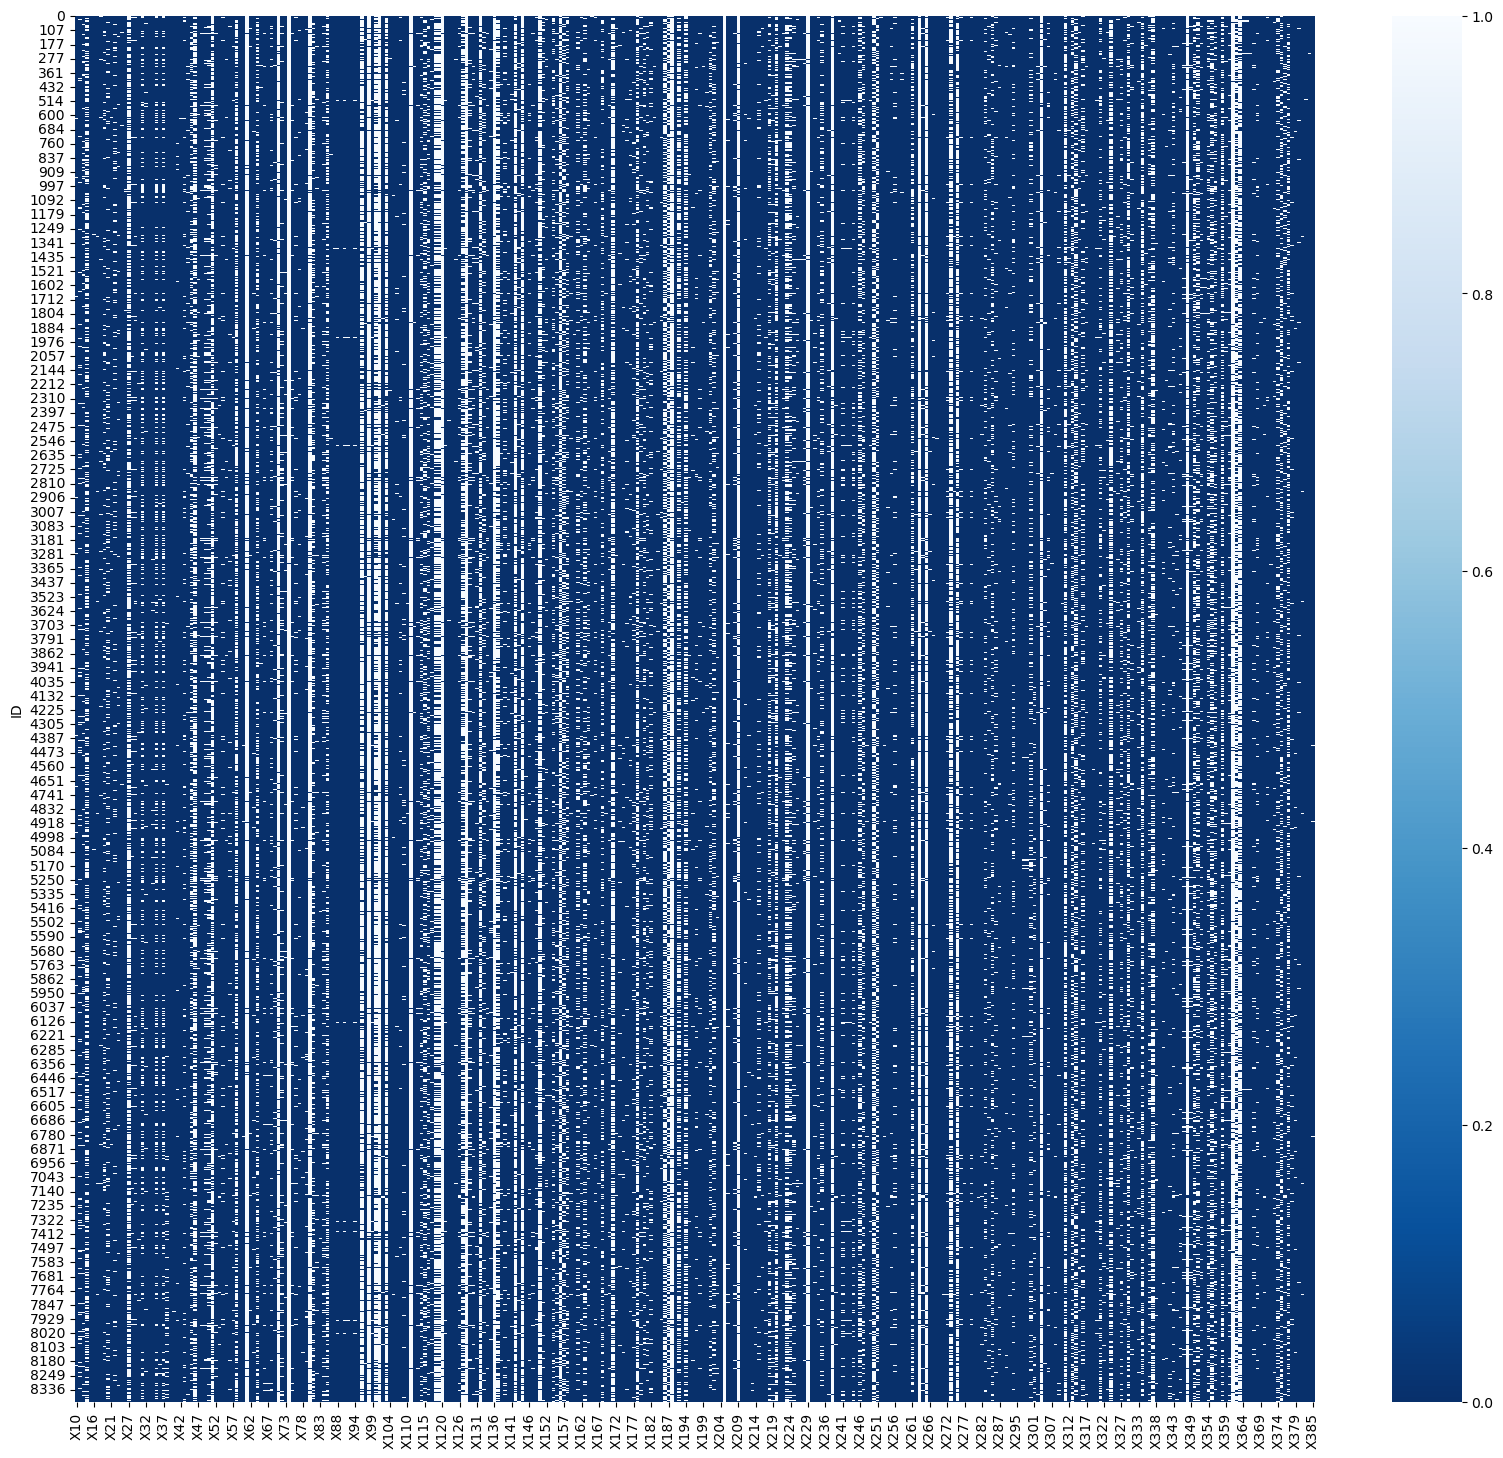

In [11]:
# 정답인 y를 제외하고 어떤 값이 크고 작은지 확인하는 히트맵
# 기술통계를 구했을 때 수치데이터가 너무 많아서 시각화해서 표현해 본 것!

plt.figure(figsize=(20,18))
_ = sns.heatmap(train.select_dtypes(include="number").drop(columns="y"), cmap="Blues_r")

## One-Hot-Encoding

In [12]:
cate_cols = train.select_dtypes(exclude="number").columns.tolist()
cate_cols

['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8']

In [13]:
# category 데이터는 변환해주자. 용량이 진짜 많이 준다!

print(train[cate_cols].info())
print(train[cate_cols].astype("category").info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4209 entries, 0 to 8417
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   X0      4209 non-null   object
 1   X1      4209 non-null   object
 2   X2      4209 non-null   object
 3   X3      4209 non-null   object
 4   X4      4209 non-null   object
 5   X5      4209 non-null   object
 6   X6      4209 non-null   object
 7   X8      4209 non-null   object
dtypes: object(8)
memory usage: 295.9+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4209 entries, 0 to 8417
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   X0      4209 non-null   category
 1   X1      4209 non-null   category
 2   X2      4209 non-null   category
 3   X3      4209 non-null   category
 4   X4      4209 non-null   category
 5   X5      4209 non-null   category
 6   X6      4209 non-null   category
 7   X8      4209 non-null   category
d

### sklearn 의 OneHotEncoder

``` markdown
- handle_unknown="ignore" test 에는 등장하지만  train에는 없다면 무시 한다!
    - train으로 피처의 기준을 만드는데 test 에 train에 없는 값이 있다면 그 값은 피처로 만들지 않는다.

- fit은 train 에만 한다.
    - train을 기준으로 삼아야 하기 때문이다. 
    - test에는 fit하지 않고 test 는 transform 만 합니다.

- OneHotEncoder 는 전체 데이터를 변환하기 때문에 범주가 아닌 수치 데이터도 모두 인코딩 한다.
    - 그래서 범주값 데이터만 따로 넣어 인코딩해주어야 합니다.
    - pd.get_dummies() 의 장점은 이런 전처리 없이 범주 데이터만 OneHotEncoding 한다는 점입니다.

- pd.get_dummies() 의 단점은 train 데이터의 특성을 학습하지 않기 때문에 train 데이터에만 있고 test 데이터에는 없는 카테고리를 test 데이터에서 원핫인코딩 된 칼럼으로 바꿔주지 않는다는 점이다. 

- 반면 sklearn의 OneHotEncoder 는 train 데이터의 특성을 학습할 수 있다!


    타이타닉 데이터의 embarked 처럼 S, C, Q 정도의 3가지 값만 있는 간단한 변수 몇 가지라면 손으로 인코딩해도 되지만
    여기에서처럼 변수가 많을 때는 OneHotEncoder 나 pd.get_dummies() 를 사용하는 것이 좋다.
```

In [14]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(handle_unknown="ignore")
train_ohe =  ohe.fit_transform(train[cate_cols])
test_ohe = ohe.transform(test[cate_cols])

print(train_ohe.shape, test_ohe.shape)

(4209, 195) (4209, 195)


In [15]:
# OneHotEncoder 반환값은 np.array 형태이기 때문에 df 로 별도의 변환이 필요하다. 
train_ohe.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [16]:
# Get output feature names for transformation.
ohe.get_feature_names_out()

array(['X0_a', 'X0_aa', 'X0_ab', 'X0_ac', 'X0_ad', 'X0_af', 'X0_ai',
       'X0_aj', 'X0_ak', 'X0_al', 'X0_am', 'X0_ao', 'X0_ap', 'X0_aq',
       'X0_as', 'X0_at', 'X0_au', 'X0_aw', 'X0_ax', 'X0_ay', 'X0_az',
       'X0_b', 'X0_ba', 'X0_bc', 'X0_c', 'X0_d', 'X0_e', 'X0_f', 'X0_g',
       'X0_h', 'X0_i', 'X0_j', 'X0_k', 'X0_l', 'X0_m', 'X0_n', 'X0_o',
       'X0_q', 'X0_r', 'X0_s', 'X0_t', 'X0_u', 'X0_v', 'X0_w', 'X0_x',
       'X0_y', 'X0_z', 'X1_a', 'X1_aa', 'X1_ab', 'X1_b', 'X1_c', 'X1_d',
       'X1_e', 'X1_f', 'X1_g', 'X1_h', 'X1_i', 'X1_j', 'X1_k', 'X1_l',
       'X1_m', 'X1_n', 'X1_o', 'X1_p', 'X1_q', 'X1_r', 'X1_s', 'X1_t',
       'X1_u', 'X1_v', 'X1_w', 'X1_y', 'X1_z', 'X2_a', 'X2_aa', 'X2_ac',
       'X2_ae', 'X2_af', 'X2_ag', 'X2_ah', 'X2_ai', 'X2_ak', 'X2_al',
       'X2_am', 'X2_an', 'X2_ao', 'X2_ap', 'X2_aq', 'X2_ar', 'X2_as',
       'X2_at', 'X2_au', 'X2_av', 'X2_aw', 'X2_ay', 'X2_b', 'X2_c',
       'X2_d', 'X2_e', 'X2_f', 'X2_g', 'X2_h', 'X2_i', 'X2_j', 'X2_k',
       'X

### ohe 결과와 수치데이터를 합쳐보자

In [17]:
df_train_ohe = pd.DataFrame(train_ohe.toarray(), columns=ohe.get_feature_names_out())
df_train_ohe.index = train.index
df_train_ohe

,X0_a,X0_aa,X0_ab,X0_ac,X0_ad,X0_af,X0_ai,X0_aj,X0_ak,X0_al,...,X8_p,X8_q,X8_r,X8_s,X8_t,X8_u,X8_v,X8_w,X8_x,X8_y
ID,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8405,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8406,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8412,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
train_num = train.select_dtypes(include="number")
train_num

,y,X10,X12,X13,X14,X15,X16,X17,X18,X19,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
ID,,,,,,,,,,,,,,,,,,,,,
0,130.81,0,0,1,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
6,88.53,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
7,76.26,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
9,80.62,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13,78.02,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8405,107.39,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
8406,108.77,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
8412,109.22,0,1,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [19]:
df_train = pd.concat([train_num, df_train_ohe], axis=1)
print(train.shape, df_train.shape)
df_train

(4209, 365) (4209, 552)


,y,X10,X12,X13,X14,X15,X16,X17,X18,X19,...,X8_p,X8_q,X8_r,X8_s,X8_t,X8_u,X8_v,X8_w,X8_x,X8_y
ID,,,,,,,,,,,,,,,,,,,,,
0,130.81,0,0,1,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,88.53,0,0,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,76.26,0,0,0,0,0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9,80.62,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13,78.02,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8405,107.39,0,0,0,1,0,0,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8406,108.77,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8412,109.22,0,1,1,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
# test 도 동일하게 해준다. 

# ohe 결과를 df 로 변경
df_test_ohe = pd.DataFrame(test_ohe.toarray(), columns=ohe.get_feature_names_out())
df_test_ohe.index = train.index

# 수치형 데이터
test_num = test.select_dtypes(include="number")

# 합쳐주기
df_test = pd.concat([test_num, df_test_ohe], axis=1)
test.shape, df_test.shape

((4209, 364), (8418, 551))

In [21]:
# One-hot-Encoding 이 성공적인지 확인한다. 즉 모두 숫자로 바뀌었다면, exclude="number" 했을 때 나오는 값이 없어야 한다!
df_train.select_dtypes(exclude="number")[:5]

""
ID
0
6
7
9
13


### Hold-out-validation

- sklearn의 train_test_split 기능으로 train, valid 를 나눌거다.
- valid 를 만드는 이유는 제출해보기 전에 어느정도의 스코어가 나올지 확인해보기 위해서이다. 
- Hold-out-validation은 속도가 빠른게 장점이다. 

In [22]:
X = df_train.drop(columns="y")
y = df_train["y"]
print(X.shape, y.shape)
display(X.head())
display(y.head())

(4209, 551) (4209,)


,X10,X12,X13,X14,X15,X16,X17,X18,X19,X20,...,X8_p,X8_q,X8_r,X8_s,X8_t,X8_u,X8_v,X8_w,X8_x,X8_y
ID,,,,,,,,,,,,,,,,,,,,,
0,0,0,1,0,0,0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0,0,0,0,0,0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0,0,0,0,0,0,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


ID
0     130.81
6      88.53
7      76.26
9      80.62
13     78.02
Name: y, dtype: float64

In [23]:
# train_test_split으로 train, valid 나누기!
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((3367, 551), (842, 551), (3367,), (842,))

## 선형회귀

✨ 종속변수 y와 한개 이상의 독립변수 X와의 선형 상관관계를 모델링하는 회귀분석 기법

✨주요 파라미터 <br>
fit_intercept: 모델에 대한 절편 계산여부, False로 입력하면 절편 계산X <br>
n_jobs: 계산에 사용할 스레드 수

✨ 특징 <br>
- 다른 모델들에 비해 간단한 작동 원리를 가지고 있다.
- 학습 속도가 매우 빠르다.
- 조정해줄 파라미터가 적다.
- 이상치에 영향을 크게 받는다.
- 데이터가 수치형 변수로만 이루어져 있을 경우, 데이터의 경향성이 뚜렷할 경우 사용하기 좋다.

✨선형 회귀 모델의 단점을 보완한 모델 <br>
- Ridge
- Lasso
- ElasticNet

In [24]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(n_jobs=-1, positive=True)
model

LinearRegression(n_jobs=-1, positive=True)

In [25]:
model.fit(X_train, y_train)

LinearRegression(n_jobs=-1, positive=True)

- model.score 의 결과 값은 r2score 이다.
- r2score는 0과 1사이의 값을 가지며 1에 가까울수록 선형회귀 모델이 데이터에 대하여 높은 연관성을 가지고 있다고 해석한다.

$$r^2 score = (1 - \frac{u}{v})$$
$$ u = ((y_{true} - y_{pred})** 2).sum() $$ 
$$ v = ((y_{true} - y_{true}.mean()) ** 2).sum() $$ 
$$ R^2 score = 1 - \frac{((y_{true} - y_{pred})** 2).sum()}{((y_{true} - y_{true}.mean()) ** 2).sum()}$$

In [28]:
model.score?

Signature: model.score(X, y, sample_weight=None)
Docstring:
Return the coefficient of determination of the prediction.

The coefficient of determination :math:`R^2` is defined as
:math:`(1 - \frac{u}{v})`, where :math:`u` is the residual
sum of squares ``((y_true - y_pred)** 2).sum()`` and :math:`v`
is the total sum of squares ``((y_true - y_true.mean()) ** 2).sum()``.
The best possible score is 1.0 and it can be negative (because the
model can be arbitrarily worse). A constant model that always predicts
the expected value of `y`, disregarding the input features, would get
a :math:`R^2` score of 0.0.

Parameters
----------
X : array-like of shape (n_samples, n_features)
    Test samples. For some estimators this may be a precomputed
    kernel matrix or a list of generic objects instead with shape
    ``(n_samples, n_samples_fitted)``, where ``n_samples_fitted``
    is the number of samples used in the fitting for the estimator.

y : array-like of shape (n_samples,) or (n_samples, n_ou

### 결정계수 = R제곱 통계량 = Coefficient of Determination = $R^2$ = R squred

- 결정계수 : '회귀 모델의 성과 지표'
- 1에 가까울 수록 좋은 회귀 모델
- 0에 가까울 수록 나쁜 모델
- 음수가 나올경우, 바로 폐기해야 하는 모델

$$
R^2 = 1 - \frac{\sum(오차^2)}{\sum(편차^2)} \\
\\
오차 = 실제값 - 예측값
\\
편차 = 실제값 - 평균값
$$

- 오차가 편차보다 커서 결정계수($R^2$)의 값이 음수가 된다면 이는 회귀모델의 성능이 평균값으로 예측하는 값보다 결과가 좋지 않음을 의미한다.
    - 예측값이 평균값일때, $R^2 = 0$이 된다. 음수가 나온다는건, 평균근처에도 가지 못했다는 것..
    - 예측값이 음수이면, 일괄적으로 평균값을 예측한 모델보다 성능이 떨어지는것이다. 
- $R^2=0.3$인 경우 약 30% 정도의 설명력을 가진다 라고 해석할 수 있다.


참고 : [[쉬운 설명]머신러닝 결정계수(R^2) 뜻, 증명](https://adamlee.tistory.com/entry/%EC%89%AC%EC%9A%B4-%EC%84%A4%EB%AA%85%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D-%EA%B2%B0%EC%A0%95%EA%B3%84%EC%88%98R2-%EB%9C%BB-%EC%A6%9D%EB%AA%85)

In [26]:
# 점수를 보면 쓰레기 모델이라는 것을 알 수 있다. 
model.score(X_valid, y_valid)

-4.766255450326353e+23

<AxesSubplot:xlabel='y'>

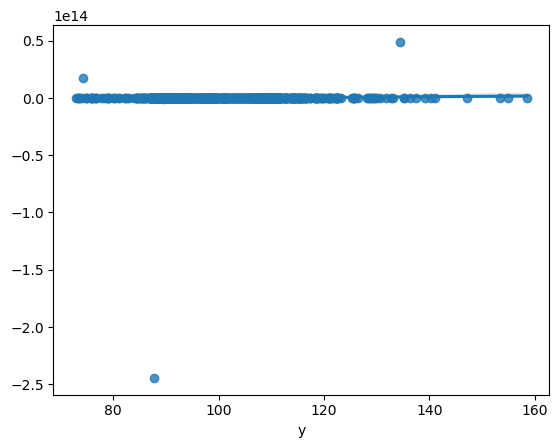

In [27]:
sns.regplot(x=y_valid, y=model.predict(X_valid))

- One-hot-encoding 시에 범주형만 해주지 않고 다 해준다면? 좀 해결이 될까?
    - sklearn 의 one-hot-encoding 은 수치형 변수도 같이 처리해준다. 
    - 범주형데이터만 one-hot-encoding 하고 수치형과 합쳤을 때 컬럼이 551개였는데, 한꺼번에 one-hot-encodiong 을 하니까 907이 됐다. 

In [29]:
train_ohe = ohe.fit_transform(train.drop(columns="y"))
df_train_ohe = pd.DataFrame(train_ohe.toarray(), columns=ohe.get_feature_names_out())
df_train_ohe.index = train.index

df_train_ohe.head()

,X0_a,X0_aa,X0_ab,X0_ac,X0_ad,X0_af,X0_ai,X0_aj,X0_ak,X0_al,...,X380_0,X380_1,X382_0,X382_1,X383_0,X383_1,X384_0,X384_1,X385_0,X385_1
ID,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [30]:

test_ohe = ohe.transform(test)
df_test_ohe = pd.DataFrame(test_ohe.toarray(), columns=ohe.get_feature_names_out())
df_test_ohe.index = test.index

df_test_ohe.head()

,X0_a,X0_aa,X0_ab,X0_ac,X0_ad,X0_af,X0_ai,X0_aj,X0_ak,X0_al,...,X380_0,X380_1,X382_0,X382_1,X383_0,X383_1,X384_0,X384_1,X385_0,X385_1
ID,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [32]:
X = df_train_ohe
y = train["y"]

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((3367, 907), (842, 907), (3367,), (842,))

In [33]:
# 여전히 LinearRegression 모델이다 

model.fit(X_train, y_train)
model.score(X_valid, y_valid)

-3.0840938382044176e+23

점수가 아까보다는 낫지만, 여전히 쓰레기다.
<br>
RandomForest 는 어떨까??

In [34]:
from sklearn.ensemble import RandomForestRegressor

random_model = RandomForestRegressor(random_state=42)
random_model

RandomForestRegressor(random_state=42)

In [35]:
# 정상적인 점수가 나왔다!!

random_model.fit(X_train, y_train)
random_model.score(X_valid, y_valid)

0.45308821676526323

In [40]:
from sklearn.metrics import r2_score

y_predict = random_model.predict(X_valid)

r2_score(y_valid, y_predict)

0.45308821676526323

In [42]:
# r2_score 를 실제로 계산해보자!

1 - ((y_valid - y_predict)**2).sum() / ((y_valid - y_valid.mean())**2).sum()

0.45308821676526323

### 선형회귀의 단점을 보완한 모델들은 성능이 좀더 잘나올까? (물론 이 데이터셋에서만이지만!)
Linear Regression 선형 회귀모델의 Cost Function 비용함수에 페널티를 적용한 방식이다.
- `Ridge` : 페널티는 Lambda * 계수 coefficient 제곱의 합이다.
- `Lasso` : 페널티는 Lambda * coefficient 절대값의 합이다.
    - 어떤 독립변수의 경우 아예 사라지게 될 수도 있게 되면서 feature selection, 상대적으로 더 중요한 독립변수를 선택할 수 있게된다.

- `ElasticNet` : 패널티는 (1-alpha)/2 * Ridge의 패널티 + alpha * Lasso의 패널티
    - Ridge의 L2, Lasso의 L1을 합쳐서 비용함수를 계산한 것이다.
    - alpha가 0에 가까우면 elasticNet은 Ridge에 가까워지고, alpha가 1에 가까우면 elasticNet은 Lasso에 가까워지게 된다.

<br>

```
Ridge, Lasso, elasticNet 회귀 분석에서는 다중공선성(multicollinearity) 문제와 over-fitting 과적합 문제 방지를 위해 정규화 방식이 적용되었다.
- 다중공선성(multicollinearity)이란 독립변수 x들간의 강한 상관관계가 나타나서, 
독립변수들이 독립적이지 않는 문제가 발생하게 되는 현상을 말한다. 
이 경우 coefficient 추정치가 부정확해지고 standard error 값이 높아지게 된다.

- Ridge 회귀 모델은  L2 정규화
- Lasso 회귀모델은 L1 정규화
- elasticNet은 Ridge의 L2와 Lasso의 L1 정규화 혼합
```

<br>

참고 [LINEAR, RIDGE, LASSO, ELASTICNET REGRESSION 회귀모델 4인방](https://nurilee.com/2020/01/26/data-science-model-summary-linear-ridge-lasso-elasticnet/)

In [44]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV, ElasticNet,ElasticNetCV

In [45]:
# Ridge Regression
# alpha는 규제의 강도를 의미한다. 
alphas = [0.0001, 0.001, 0.01, 0.1, 0.3, 0.5, 0.7, 1]

# select alpha 0.0001 or 0.001 or 0.01 by checking R2, MSE, RMSE
for a in alphas:
    model = Ridge(alpha=a).fit(X_train, y_train)
    score = model.score(X_valid, y_valid)
    pred_y = model.predict(X_valid)
    mse = mean_squared_error(y_valid, pred_y)
    print("Alpha:{0:.4f}, R2:{1:.2f}, MSE:{2:.2f}, RMSE:{3:.2f}".format(a, score, mse, np.sqrt(mse)))

Alpha:0.0001, R2:0.54, MSE:70.90, RMSE:8.42
Alpha:0.0010, R2:0.54, MSE:70.90, RMSE:8.42
Alpha:0.0100, R2:0.54, MSE:70.85, RMSE:8.42
Alpha:0.1000, R2:0.55, MSE:70.51, RMSE:8.40
Alpha:0.3000, R2:0.55, MSE:69.93, RMSE:8.36
Alpha:0.5000, R2:0.55, MSE:69.49, RMSE:8.34
Alpha:0.7000, R2:0.56, MSE:69.13, RMSE:8.31
Alpha:1.0000, R2:0.56, MSE:68.69, RMSE:8.29


In [50]:
ridge_cv=RidgeCV(alphas=alphas, cv=5)
model = ridge_cv.fit(X_train, y_train)
print(model.alpha_)

1.0


In [54]:
# calculate Ridge R2, MSE, RMSE from test data
ridge=Ridge(alpha=0.9).fit(X_train, y_train)
ypred_ridge = ridge.predict(X_valid)
score_ridge = ridge.score(X_valid, y_valid)
mse_ridge = mean_squared_error(y_valid, ypred_ridge)
print("Final Result: Ridge R2:{0:.3f}, MSE:{1:.2f}, RMSE:{2:.2f}".format(score_ridge, mse_ridge, np.sqrt(mse_ridge)))

Final Result: Ridge R2:0.558, MSE:68.82, RMSE:8.30


In [60]:
# Lasso Regression
alphas = [0.01, 0.1, 0.3, 0.5, 0.7, 1]

# select alpha 0.0001 or 0.001 or 0.01 by checking R2, MSE, RMSE
for a in alphas:
    model = Lasso(alpha=a).fit(X_train, y_train)
    score = model.score(X_valid, y_valid)
    pred_y = model.predict(X_valid)
    mse = mean_squared_error(y_valid, pred_y)
    print("Lasso Alpha:{0:.4f}, R2:{1:.2f}, MSE:{2:.2f}, RMSE:{3:.2f}".format(a, score, mse, np.sqrt(mse)))

Lasso Alpha:0.0100, R2:0.60, MSE:62.67, RMSE:7.92
Lasso Alpha:0.1000, R2:0.58, MSE:65.58, RMSE:8.10
Lasso Alpha:0.3000, R2:0.54, MSE:71.82, RMSE:8.47
Lasso Alpha:0.5000, R2:0.47, MSE:83.19, RMSE:9.12
Lasso Alpha:0.7000, R2:0.43, MSE:88.13, RMSE:9.39
Lasso Alpha:1.0000, R2:0.41, MSE:92.15, RMSE:9.60


In [61]:
lasso_model=Lasso(alpha=0.01).fit(X_train, y_train)
ypred_lasso = lasso_model.predict(X_valid)
score_lasso = lasso_model.score(X_valid, y_valid)
mse_lasso = mean_squared_error(y_valid, ypred_lasso)
print("Final Lasso Result: Ridge R2:{0:.3f}, MSE:{1:.2f}, RMSE:{2:.2f}".format(score_lasso, mse_lasso, np.sqrt(mse_lasso)))

Final Lasso Result: Ridge R2:0.597, MSE:62.67, RMSE:7.92


In [66]:
# ElasticNet
# 엘라스틱넷에서 l1_ratio로 l1 norm의 비중을 지정할 수 있으며,
# 나머지 비중은 l2 norm이 반영되게 된다.(l1_ratio는 0에서 1 사이만 가능히다.)

alphas = [0.01, 0.1, 0.3, 0.5, 0.7, 1]

# select alpha 0.0001 or 0.001 or 0.01 by checking R2, MSE, RMSE
for a in alphas:
    model = ElasticNet(alpha=a, l1_ratio=0.5).fit(X_train, y_train)
    score = model.score(X_valid, y_valid)
    pred_y = model.predict(X_valid)
    mse = mean_squared_error(y_valid, pred_y)
    print("ElasticNet Alpha:{0:.4f}, R2:{1:.2f}, MSE:{2:.2f}, RMSE:{3:.2f}".format(a, score, mse, np.sqrt(mse)))

ElasticNet Alpha:0.0100, R2:0.59, MSE:63.33, RMSE:7.96
ElasticNet Alpha:0.1000, R2:0.58, MSE:66.10, RMSE:8.13
ElasticNet Alpha:0.3000, R2:0.54, MSE:71.54, RMSE:8.46
ElasticNet Alpha:0.5000, R2:0.51, MSE:76.75, RMSE:8.76
ElasticNet Alpha:0.7000, R2:0.47, MSE:82.18, RMSE:9.07
ElasticNet Alpha:1.0000, R2:0.42, MSE:90.01, RMSE:9.49


In [67]:
el_model=ElasticNet(alpha=0.01).fit(X_train, y_train)
ypred_el = el_model.predict(X_valid)
score_el = el_model.score(X_valid, y_valid)
mse_el = mean_squared_error(y_valid, ypred_el)
print("Final Lasso Result: Ridge R2:{0:.3f}, MSE:{1:.2f}, RMSE:{2:.2f}".format(score_el, mse_el, np.sqrt(mse_el)))

Final Lasso Result: Ridge R2:0.593, MSE:63.33, RMSE:7.96


-> 선형회귀의 단점을 보완한 모델들은 성능이 확실히 잘 나온다!

![](https://item.kakaocdn.net/do/fd0050f12764b403e7863c2c03cd4d2d7154249a3890514a43687a85e6b6cc82)